Cleaning and peparing data

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [104]:
#read the train data
df_train=pd.read_csv("./data/train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [105]:
#read the test data
df_test=pd.read_csv("./data/test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [106]:
#difference between datasets

columns_only_in_train = df_train.columns.difference(df_test.columns)

columns_only_in_test = df_test.columns.difference(df_train.columns)

print("Columns only in train:", columns_only_in_train)
print("Columns only in test:", columns_only_in_test)

Columns only in train: Index(['Purchase'], dtype='object')
Columns only in test: Index([], dtype='object')


In [107]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [108]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [109]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


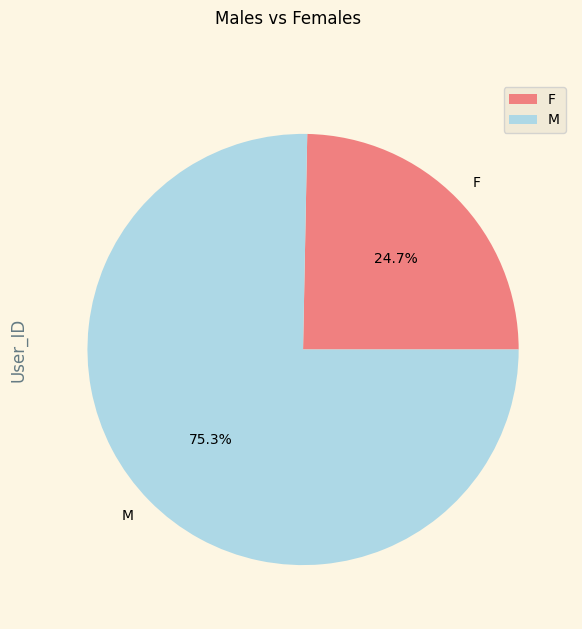

In [110]:
gender_count = df_train[['Gender', 'User_ID']].groupby('Gender').count()

custom_colors = ['lightcoral', 'lightblue']

plt.style.use('Solarize_Light2')
gender_count.plot(kind='pie', autopct='%1.1f%%', subplots=True, title='Males vs Females', figsize=(12, 7),
                  colors=custom_colors)

plt.show()

array([<Axes: ylabel='User_ID'>], dtype=object)

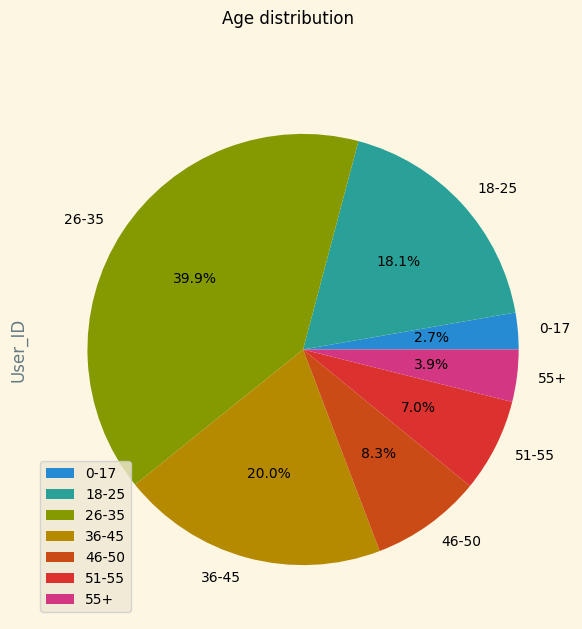

In [111]:
gender_count=df_train[['Age','User_ID']].groupby('Age').count()
gender_count
plt.style.use('Solarize_Light2')
gender_count.plot(kind='pie',autopct='%1.1f%%',subplots=True,title='Age distribution',figsize=(12,7))

In [112]:
#Drop unnecessary column
df_train.drop(['User_ID'],axis=1,inplace=True)

In [113]:
df_train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [114]:
df_train['Gender']=df_train['Gender'].map({'F':0,'M':1})
df_train

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,51-55,13,B,1,1,20,NaN,NaN,368
550064,P00375436,0,26-35,1,C,3,0,20,NaN,NaN,371
550065,P00375436,0,26-35,15,B,4+,1,20,NaN,NaN,137
550066,P00375436,0,55+,1,C,2,0,20,NaN,NaN,365


In [115]:
df_train['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [116]:
df_train['Age']=df_train['Age'].map({'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6})
df_train

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,5,13,B,1,1,20,NaN,NaN,368
550064,P00375436,0,2,1,C,3,0,20,NaN,NaN,371
550065,P00375436,0,2,15,B,4+,1,20,NaN,NaN,137
550066,P00375436,0,6,1,C,2,0,20,NaN,NaN,365


In [117]:
#df_city=pd.get_dummies(df_train['City_Category'], prefix='City')

df_train = pd.concat([df_train, pd.get_dummies(df_train['City_Category'], prefix='City')], axis=1)

#df_train=pd.concat([df_train,df_city],axis=1)
df_train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_A,City_B,City_C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370,True,False,False
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200,True,False,False
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422,True,False,False
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057,True,False,False
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969,False,False,True


In [118]:
##drop City Category Feature
df_train.drop('City_Category',axis=1,inplace=True)
df_train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_A,City_B,City_C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370,True,False,False
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200,True,False,False
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422,True,False,False
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057,True,False,False
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969,False,False,True


In [119]:
#Check for missing values

df_train.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
City_A                             0
City_B                             0
City_C                             0
dtype: int64

In [120]:
df_train['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [121]:
df_train['Product_Category_2'].describe()

count    376430.000000
mean          9.842329
std           5.086590
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [122]:
df_train['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [123]:
category_2_mode=df_train['Product_Category_2'].mode()[0]
df_train['Product_Category_2']=df_train['Product_Category_2'].fillna(category_2_mode)

df_train['Product_Category_2'].isnull().sum()

0

In [124]:
df_train['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [125]:
df_train['Product_Category_3'].describe()

count    166821.000000
mean         12.668243
std           4.125338
min           3.000000
25%           9.000000
50%          14.000000
75%          16.000000
max          18.000000
Name: Product_Category_3, dtype: float64

In [126]:
category_3_mode=df_train['Product_Category_3'].mode()[0]
df_train['Product_Category_3']=df_train['Product_Category_3'].fillna(category_3_mode)

df_train['Product_Category_3'].isnull().sum()

0

In [127]:
df_train['Purchase'].isnull().sum()

0

In [128]:
df_train.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
City_A                        0
City_B                        0
City_C                        0
dtype: int64

In [129]:
df_train['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [130]:
df_train['Stay_In_Current_City_Years']=df_train['Stay_In_Current_City_Years'].str.replace('+','')

In [131]:
df_train.info()
#Stay_In_Current_City_Years  550068 non-null  object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  City_A                      550068 non-null  bool   
 11  City_B                      550068 non-null  bool   
 12  City_C                      550068 non-null  bool   
dtypes: bool(3), fl

In [132]:
df_train['Stay_In_Current_City_Years']=df_train['Stay_In_Current_City_Years'].astype(int)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  City_A                      550068 non-null  bool   
 11  City_B                      550068 non-null  bool   
 12  City_C                      550068 non-null  bool   
dtypes: bool(3), fl

<Axes: xlabel='Age', ylabel='Purchase'>

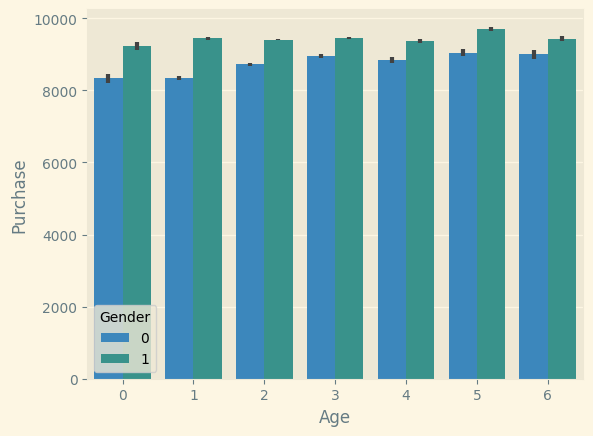

In [133]:
#sns.barplot('Age','Purchase',hue='Gender',data=df_train)
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df_train)